In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_df = pd.read_csv('/content/drive/MyDrive/Customers.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

In [4]:
customer_transaction_data = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

In [5]:
customer_data = customer_transaction_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    total_frequency=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
).reset_index()

In [6]:
customer_data = pd.merge(customer_data, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

In [7]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spend', 'total_frequency', 'avg_transaction_value']])

In [8]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

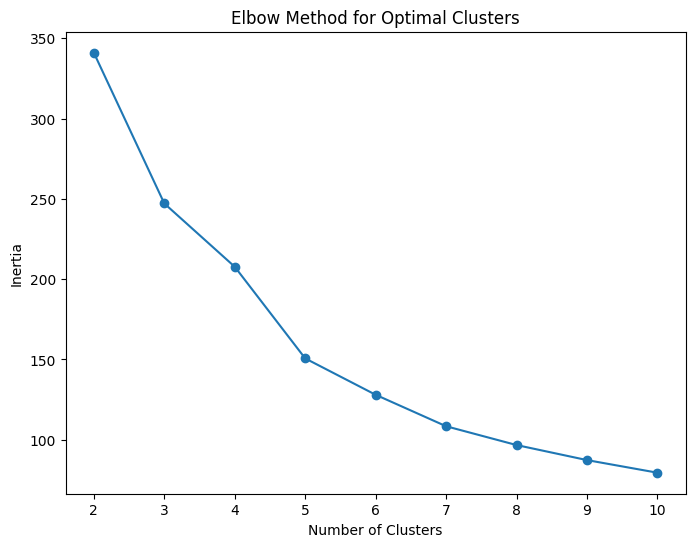

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

In [17]:
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
silhouette = silhouette_score(customer_data_scaled, customer_data['Cluster'])

In [18]:
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

DB Index: 1.0604240399923033
Silhouette Score: 0.3135106549790539


In [19]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data_scaled)

In [20]:
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_data['Cluster']

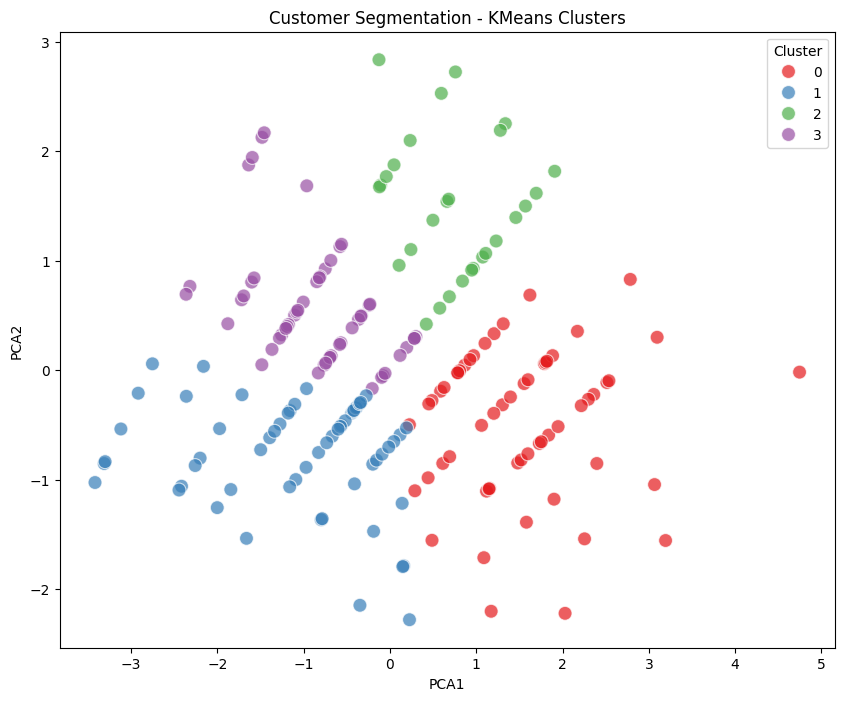

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=pca_df, s=100, alpha=0.7)
plt.title('Customer Segmentation - KMeans Clusters')
plt.show()